# Assumptions in OLS

- Number of observations greater than number of predictors

- Each observation is unique.

- No multicollinearity (we talked about this with VIF)

- Linear model

- Homoskedastiity of residuals or equal variances

- Errors are distributed normally

## Deriving OLS

In understanding the assumptions of linear regressions, we can start witht the derivation of OLS (the equation of linear regressions). Linear regressions are ultimately just algebra. In algebra, a big part of it was understanding how $x$ influences $y$. This is what we would find when finding the slope of a line.

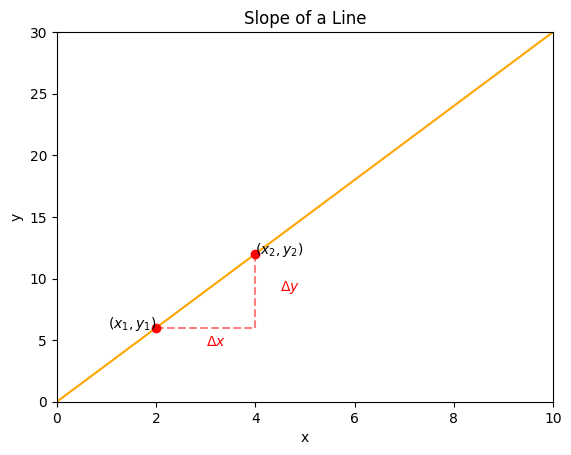

In [1]:
!pip install -q matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define the data
x = np.linspace(0, 10, 400)
slope = 3
intercept = 0
y = intercept + slope * x

# Define the points (x1, y1) and (x2, y2)
x1 = 2
y1 = slope * x1
x2 = 4
y2 = slope * x2

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y, color="orange")
ax.plot([x1, x2], [y1, y2], 'ro')  # 'ro' for red circles
ax.plot([x1, x2], [y1, y1], 'r--', alpha=0.5)  # Dashed red line
ax.plot([x2, x2], [y1, y2], 'r--', alpha=0.5)

# Annotations (using LaTeX for delta)
ax.text((x1 + x2) / 2, y1 - 1.5, r'$\Delta x$', color="red")
ax.text(x2 + 0.5, (y1 + y2) / 2, r'$\Delta y$', color="red")
ax.text(x1, y1, r'$(x_1, y_1)$', ha='right')  # ha='right' for horizontal alignment
ax.text(x2, y2, r'$(x_2, y_2)$', ha='left')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Slope of a Line")
ax.set_xlim(0, 10)
ax.set_ylim(0, slope * 10)

plt.show()



Here we can see how y changes (varies) as x changes (varies). This is what we called the slope:

$$\beta=\frac{\Delta y}{\Delta x}$$



But how can we actually use this? Well, let's consider a case where we have a claim where the only thing that affects their cost is how many times they fill a certain prescription.

$$total \: cost=\frac{cost}{fill}\cdot fills$$



This would mean that even if we did not know the price of the drug, we could figure it out, even if we only had the total cost and total number of fills.

$$total \: cost=\frac{cost}{fills}\cdot fills$$
$$\frac{total \: cost}{fills}=\frac{cost}{fill}$$


Which with actual numbers would mean:

$$80=\frac{cost}{fills}\cdot 4$$
$$\frac{80}{4}=20=\frac{cost}{fill}$$


But we know many thinsg can influence an outcome. So if that person had two prescriptions, then:



$$total \: cost=\frac{cost_1}{fill_1}\cdot fills_1+\frac{cost_2}{fill_2}\cdot fills_2$$






To simplify the language here, we can use the slope notation that we had before, so $\frac{cost_1}{fill_1}=\beta_1$, etc. making:


$$total \: cost=\beta_1 \cdot fills_1+\beta_2 \cdot fills_2$$





So we can go back to our example and try to solve it. Let's say we have


$$100=4\beta_1+1 \beta_2$$

What happens if we try to solve for each price? We could write:


$$\beta_2=100-4\beta_1$$

But we cannot get actual values here. That is because we have more unknowns than we have equations. This goes to the first assumption of **Number of observations greater than number of predictors**.



That means that if we have two drugs we would like to find the price of, given their prescription counts and total dollars,  we would need at least two different observations for them to figure out their costs. But what if we only have the following two equations.


$$100=4\beta_1+1 \beta_2$$


$$100=4\beta_1+1 \beta_2$$



Well technically we have two equations, but the second equation does not give us any information that was not already in the first equation. So we don't need just as many equations as we have unknowns, we need at least as many unique equations as we have unknowns. **This is one of the things that makes our second rule of "Each observation is unique.** **This is also related to our assumption that there is no multicollinearity, but that is more rigorous of a proof, and understanding VIF is more than sufficient for understanding why.**






So instead, we can look at their bill in June and July and see:


$$100=4\beta_1+1 \beta_2$$


$$120=4\beta_1+2 \beta_2$$


So we know we would need to solve one equation to get one variable in terms of the other


$$\beta_2=100-4\beta_1$$


, and then plug that into the other equation.....


$$120=4\beta_1+2(100-4\beta_1)$$
$$120=4\beta_1+200-8\beta_1$$
$$4\beta_1=80$$
$$\beta_1=20$$

Which we plug back into the original equation to get:

$$\beta_2=100-4\beta_1=100-4(20)=20$$



So with 1 equation and 1 unknown, it was 1 step. With 2 equations and 2 unknowns, we get many more steps. This continues exponentially as we add more equations and more unknowns. **So what can we do?**




To figure that out, we can revisit the case with one variable. We said if we want to know the slope, we would do:

$$y=x \beta$$
$$\beta=\frac{y}{x}$$

But this skips some steps. We actually divide each side by x:

$$\frac{1}{x}\beta x=y\frac{1}{x}$$



But dividing by a number is the same as multiplying by that number to the negative 1 power, meaning:


$$\frac{1}{x}\beta x=y\frac{1}{x} \implies x^{-1}\beta x=x^{-1}y$$


This gives $\beta=x^{-1}y$ since **$x^{-1}x=1$**.


So how does that helps us? Well we are actually able to write out multiple equations in a way that can do that, which means we can write our equations:

$$100=4\beta_1+1 \beta_2$$


$$120=4\beta_1+2 \beta_2$$



can be written in matrix notation as:

$$
\overset{y}{\begin{bmatrix}
    100 \\
    120
\end{bmatrix}}
=
\overset{X}{\begin{bmatrix}
    1 & 4  \\
    2 & 4
\end{bmatrix}}
\overset{\beta}{\begin{bmatrix}
    \beta_1 \\
    \beta_2
\end{bmatrix}}
$$




So now whether we have 1 equation and 1 unknown, or 50 equations and 50 unknowns, we can write them as:


$\beta=x^{-1}y$

**This is what is meant in the assumption of "Linear Model", that the expression can be written as a linear system of equations.**



## Matrix multiplication


But let's look at our matrix. Since we said:

$$
\begin{aligned}
    &\begin{aligned}
        100 &= 4\beta_1 + 1\beta_2 \\
        120 &= 4\beta_1 + 2\beta_2
    \end{aligned}
    & \implies
    & \begin{bmatrix}
        100 \\
        120
    \end{bmatrix}
    =
    \begin{bmatrix}
        4 & 1 \\
        4 & 2
    \end{bmatrix}
    \begin{bmatrix}
        \beta_1 \\
        \beta_2
    \end{bmatrix}
\end{aligned}
$$




**This is where the explanation starts to get a little too loose. Tighten it up a bit**

This means that we do a dot product where each row of $x$ has a dot product with the column of B.




$$
\begin{aligned}
    &\begin{aligned}
        100 &= 4\beta_1 + 1\beta_2 \\
        120 &= 4\beta_1 + 2\beta_2
    \end{aligned}
    & \implies
    & \begin{bmatrix}
        \color{red}{100} \\
        120
    \end{bmatrix}
    =
    \begin{bmatrix}
        \color{blue}{4} & \color{blue}{1} \\
        4 & 2
    \end{bmatrix}
    \begin{bmatrix}
        \color{green}{\beta_1} \\
        \color{green}{\beta_2}
    \end{bmatrix}
\end{aligned}
$$

Below, we highlight the matrix multiplication step-by-step:

$$
\begin{bmatrix}
    \color{red}{100} \\
    120
\end{bmatrix}
=
\begin{bmatrix}
    \color{blue}{4} & \color{blue}{1} \\
    4 & 2
\end{bmatrix}
\begin{bmatrix}
    \color{green}{\beta_1} \\
    \color{green}{\beta_2}
\end{bmatrix}
$$

Here, <span style="color:red;">100</span> is the dot product of the first row of <span style="color:blue;">X = [4, 1]</span> and the column of <span style="color:green;">β = [β<sub>1</sub>, β<sub>2</sub>]</span>:

$$
\color{red}{100} = \color{blue}{4} \cdot \color{green}{\beta_1} + \color{blue}{1} \cdot \color{green}{\beta_2}
$$

Likewise, \(\color{red}{120}\) is the dot product of the second row of <span style="color:blue;">X = [4, 2]</span> and the column of <span style="color:green;">β = [β<sub>1</sub>, β<sub>2</sub>]</span>:

$$
\color{red}{120} = \color{blue}{4} \cdot \color{green}{\beta_1} + \color{blue}{2} \cdot \color{green}{\beta_2}
$$




This means to be able to do matrix multiplication, we need the same number of columns in $X$ as rows in $\beta$. We write the dimensions of a matrix like so:


To perform matrix multiplication, the number of columns in matrix $X$ must be equal to the number of rows in vector $\beta$. This requirement ensures that each element in the resulting product is a sum of products, calculated by taking the dot product of rows from $X$ with columns from $\beta$.

We write the dimensions of a matrix as follows:

- $X$ is an $n \times k$ matrix, where $n$ is the number of observations (rows) and $k$ is the number of predictors including the intercept term (columns).
- $\beta$ is a $k \times 1$ vector.
- The resulting product $y$ is an $n \times 1$ vector.

Here’s how we denote the dimensions:

$$
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}_{n \times 1}
=
\begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1k} \\
    x_{21} & x_{22} & \cdots & x_{2k} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{nk}
\end{bmatrix}_{n \times k}
\begin{bmatrix}
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_k
\end{bmatrix}_{k \times 1}
$$







### Dimensions of Matrices in Matrix Multiplication

In matrix algebra, the order of multiplication matters. Specifically, the number of columns in $X$ must equal the number of rows in $\beta$. We can visualize this by writting the dimensions, such as $X$ which has $n$ rows, and $k$ columns as:


$$
\begin{array}{c}
 & X  \\
& \left[ n \times k \right]\\
\end{array}
$$



And since the number of columns in $X$ must equal the number of rows in $\beta$, that means that when we write an equation, the inner dimensions much match. And the result takes the outter dimensions.


$$
\begin{array}{cccc}
\ & y & = & X \beta \\
& \left[ \color{red}{n} \times \color{red}{1} \right] & & \left[ \color{red}{n} \times \color{blue}{k} \right] \cdot \left[ \color{blue}{k} \times \color{red}{1} \right] \\
\end{array}
$$







## Inverse Rules

So the equation $\beta=\frac{y}{x}$ again skips steps. The steps are actually

We said that $x^{-1}x=1$. The term $x^{-1}$ is known as the inverse of $x$. We won't get into why, but the inverse of a matrix is only defined is that matrix is square. Which means if $x$ has the following dimensions:

$$
\begin{array}{c}
 & X  \\
& \left[ n \times k \right]\\
\end{array}
$$

Then $n$ needs to equal $k$ to be invertible.


So why do we care about that? Well if we think about our data, we could have 1,000,000 observations, and only 50 things that effect our cost. This would mean that our matrix of coefficients would be:

$$
\begin{array}{c}
 & X  \\
& \left[ 1,000,000 \times 50 \right]\\
\end{array}
$$

And here $n \neq k$, which means there is no such thing as $x^{-1}$. So what can we do?


Well let's go back to the drawing board. Let's think of the something like:



$$4x=8$$

We said before that we would multiply by the inverse of 4 to solve this:


$$(4)^{-1}4x=(4)^{-1}8 \implies 1x=(4)^{-1}8$$



But 4 can be decomposed. So instead we could write:

$$4x=8 \implies (2 \times 2)x=8$$


Then our inverse would be:



$$(2 \times 2)x=8 \implies (2 \times 2)^{-1}(2 \times 2)x=(2 \times 2)^{-1}8 \implies 1x=(2 \times 2)^{-1}8$$



So how does that help us? Well it tips us off that we can modify our equation to give us something that is invertible. Lucky for us there is an operation known as the transpose, which we would write the transpose of $x$ as $x'$, which takes the rows of the initial Matrix, and turns them into the columns of the transpose. This would mean if we had:

$$
\begin{array}{c}
 & X  \\
& \left[ 1,000,000 \times 50 \right]\\
\end{array}
$$

Then 

$$
\begin{array}{c}
 & X'  \\
& \left[ 50 \times 1,000,000 \right]\\
\end{array}
$$


So why would we care about this? Well if we multiply them, the result would be square:

$$
\begin{array}{ccc}
 & X' X \\
 & \left[ 50 \times 50 \right] \\
\end{array}
$$

This is necessary to be able to invert this. So now to solve for our prices, given that we have more observations than unknowns, we would do:

$$y=x \beta$$
$$x'y=x'x \beta$$
$$(x'x)^{-1}x'y=(x'x)^{-1}x'x \beta$$
$$(x'x)^{-1}x'y=\beta$$



**This is OLS.....linear regression**






## Stochastic processes



But in the real world, there will always be some noise in our data. So instead of the world being generated by:

$$y=x \beta$$

We have some noise, which we call the error term:



$$y=x \beta + \epsilon$$




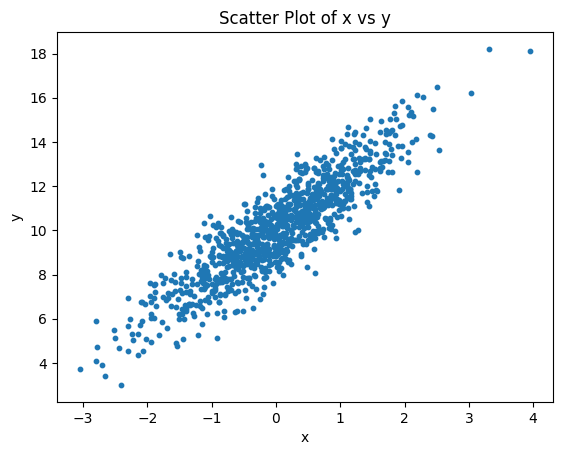

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set seed for reproducibility (equivalent to set.seed(1) in R)
np.random.seed(1)

n = 1000  # number of observations
x = np.random.randn(n)  # Explanatory/Independent Variable (randn for standard normal)
epsilon = np.random.randn(n)  # Error term

beta0 = 10  # Intercept parameter
beta1 = 2  # Slope Parameter

# Linear model
y = beta0 + beta1 * x + epsilon

# Data frame (using pandas for consistency with common Python data analysis)
df = pd.DataFrame({'x': x, 'y': y})

# Graph (using matplotlib, with seaborn-style theme for aesthetics)
fig, ax = plt.subplots() #figsize is optional
ax.scatter(df['x'], df['y'], s=10) # s controls point size, can be removed
ax.set_xlabel("x") #No need for latex here
ax.set_ylabel("y")
ax.set_title("Scatter Plot of x vs y")
plt.show()


So when we run OLS, we would actually only be able to guess the value of $\beta$, which we call our estimate:

$$\hat{\beta}=(x'x)^{-1}x'y$$



But what about $\epsilon$? Well this relates to the conditions that make OLS BLUE.

If we use the OLS form from before, we get:

$$y=x \beta + \epsilon$$
$$y - \epsilon= x \beta $$
$$x'(y - \epsilon)= x'x \beta $$
$$x'y - x'\epsilon= x'x \beta $$
$$(x'x)^{-1}(x'y - x'\epsilon)= (x'x)^{-1}x'x \beta $$
$$(x'x)^{-1}(x'y - x'\epsilon)= \hat{\beta} $$



We still see the $\epsilon$ here. But let's look at another property of matrices, which is orthogonality. A vector can represent a list of numbers, such as a list of the total dollars spent on a claim. For example, consider the vector:

$$
\mathbf{v} = \begin{bmatrix}
500 \\
750 \\
200 \\
450 \\
300
\end{bmatrix}
$$

Here, $\mathbf{v}$ represents the total dollars spent on five different claims. 

But it can also mean direction in a certain dimension such as a two dimensional vector can represent the direction of a line in the x and y directions.

$$
\mathbf{v} = \begin{bmatrix}
x-direction \\
y-direction
\end{bmatrix}
$$


So how is that relevant? Well let's consider the following two lines


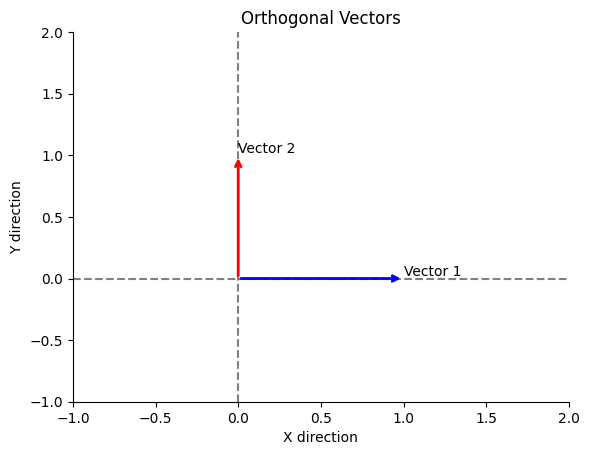

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the vectors
vector_x = [1, 0]
vector_y = [0, 1]

# Create the data frame for the vectors
vectors = pd.DataFrame({
    'x': [0, 0],
    'y': [0, 0],
    'xend': [vector_x[0], vector_y[0]],
    'yend': [vector_x[1], vector_y[1]],
    'label': ["Vector 1", "Vector 2"],
    'color': ["blue", "red"]
})

# Create the plot
fig, ax = plt.subplots()

# Use a loop to plot each vector, to handle the arrow and color correctly
for i in range(len(vectors)):
    ax.annotate("",
                xy=(vectors['xend'][i], vectors['yend'][i]),
                xytext=(vectors['x'][i], vectors['y'][i]),
                arrowprops=dict(arrowstyle="->", color=vectors['color'][i], linewidth=2), #linewidth for arrow size
                )
    ax.text(vectors['xend'][i], vectors['yend'][i], vectors['label'][i],
            va='bottom', ha='left', color='black') #va and ha for text positioning


ax.axhline(0, color="grey", linestyle="--")  # Horizontal line
ax.axvline(0, color="grey", linestyle="--")  # Vertical line

ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_title("Orthogonal Vectors")
ax.set_xlabel("X direction")
ax.set_ylabel("Y direction")

# Remove grid lines (equivalent to theme(panel.grid = element_blank()))
ax.grid(False)
# Good practice to remove the axis spines as well, for a cleaner "minimal" look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False) # Optionally keep bottom/left
# ax.spines['left'].set_visible(False)


plt.show()



Here, we see that a change in the first vector is not associated with a change in the second vector. In fact, you could move as far as you would like in the y-direction, and it never changes your location in the x direction. So the variance of one vector is not correlated with the variance in the other vector. So we can see that intuitively, but what does that mean in terms of math? Well vector one is:

$$
\mathbf{v_1} = \begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

And the other is:


$$
\mathbf{v_2} = \begin{bmatrix}
0 \\
1
\end{bmatrix}
$$



To find the dot product of these two vectors, we multiply corresponding entries and sum the results:

$$
\mathbf{v_1} \cdot \mathbf{v_2} = \begin{bmatrix}
1 \\
0
\end{bmatrix} \cdot \begin{bmatrix}
0 \\
1
\end{bmatrix}
= (1 \times 0) + (0 \times 1) = 0 + 0 = 0
$$

Since the dot product is zero, this confirms that the vectors are orthogonal. In mathematical terms, orthogonal vectors have a dot product of zero, which means they are perpendicular to each other in the vector space.


This means that if variance in one variable is uncorrelated with variance in other variable, then the dot product is 0. So how does that help us? Well going back to our equation.



$$(x'x){-1}(x'y - x'\epsilon)= \hat{\beta} $$

If our the variance of our input is not correlated with our errors, that would mean that $x$ is orthogonal with $\epsilon$, which means that $x'\epsilon=0$, which means that:

$$(x'x){-1}(x'y - x'\epsilon)= \hat{\beta} \implies (x'x){-1}(x'y - 0)= \hat{\beta}  \implies (x'x){-1}x'y= \hat{\beta}  $$


And and since we said that without any error terms that the true causal influence is:

$$(x'x)^{-1}x'y=\beta$$

And

$$\hat{\beta}=(x'x){-1}x'y$$

This means that if x and epsilon are uncorrelated, then our estimate equals the actual  value:


$$\hat{\beta}=\beta=(x'x){-1}x'y$$





**This is where our assumption of homoskedasticity comes in**. Skedasticity refers to the correlation in the variance of the error term, with respect to the x variable. Homoskedastic means that the variance of the error term is the same for all values of x which would be equaivalent to $x'\epsilon = 0$. Whereas heteroskedasticity means that the variance of the error term is correlated with x, making $x'\epsilon \neq 0$. 



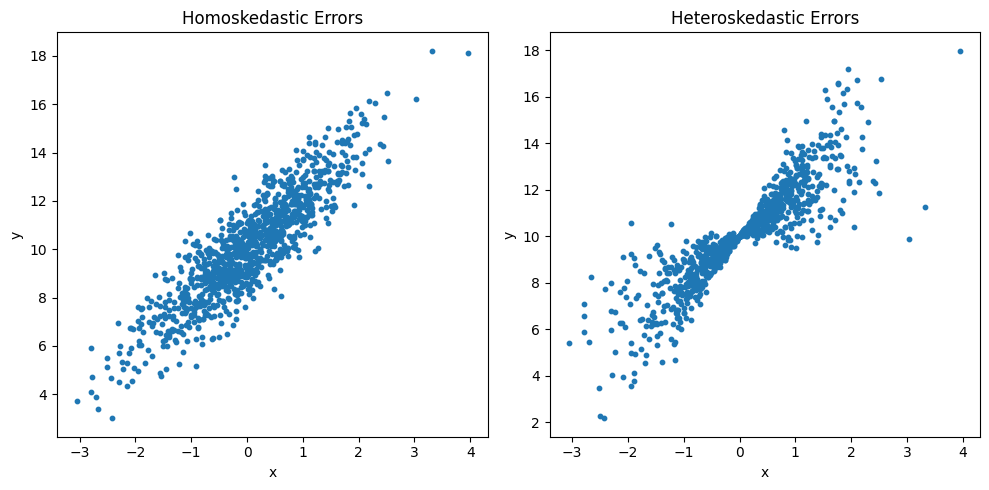

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(1)

# Number of observations
n = 1000

# Explanatory/Independent Variable
x = np.random.randn(n)

# Homoskedastic error term
epsilon_homo = np.random.randn(n)

# Heteroskedastic error term (error increases with x)
epsilon_hetero = np.random.randn(n) * np.abs(x)  # Multiply by abs(x) for heteroskedasticity

# Parameters for the linear model
beta0 = 10  # Intercept parameter
beta1 = 2  # Slope Parameter

# Linear model for homoskedastic errors
y_homo = beta0 + beta1 * x + epsilon_homo

# Linear model for heteroskedastic errors
y_hetero = beta0 + beta1 * x + epsilon_hetero

# Data frames
df_homo = pd.DataFrame({'x': x, 'y': y_homo})
df_hetero = pd.DataFrame({'x': x, 'y': y_hetero})

# Create subplots (for side-by-side plots)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot for homoskedastic errors
axes[0].scatter(df_homo['x'], df_homo['y'], s=10)
axes[0].set_title("Homoskedastic Errors")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

# Plot for heteroskedastic errors
axes[1].scatter(df_hetero['x'], df_hetero['y'], s=10)
axes[1].set_title("Heteroskedastic Errors")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")


# Display the plots
plt.tight_layout() # Prevents labels from overlapping
plt.show()



## Error terms are distributed normally


In OLS, we can go back to our statistics. We have a null hypothesis, which we need to reject or fail to reject. In doing this, we often have our null hypothesis that something has no effect. Then we see the mean $\hat{\beta}$. Then we construct a 95\% Confidence Interval, where we essentially say we know the true population mean $\hat{\beta}$ is somewhere in that range.This is what we are doing in OLS, we are essentially finding the mean correlation in variances, and see if the point estimate is statistically significant from zero. For these tests to be meaningful, we need the error terms to be distributed normally. 




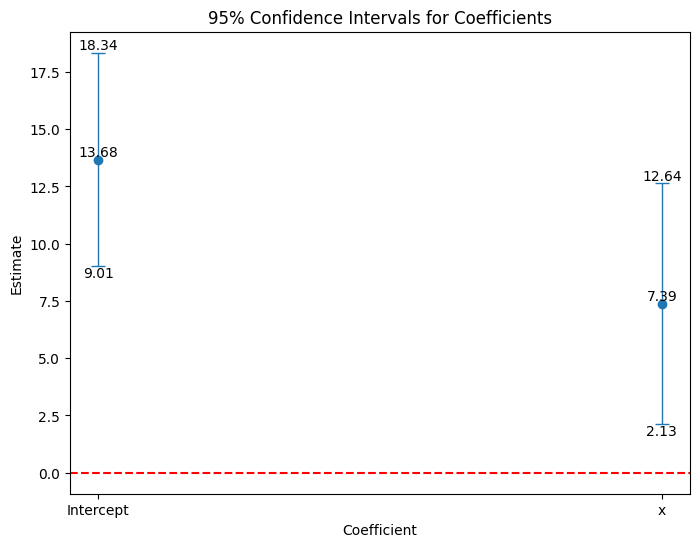

In [5]:
!pip install -q statsmodels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Set seed for reproducibility
np.random.seed(1)

# Number of observations
n = 100

# Explanatory/Independent Variable
x = np.random.randn(n)

# Error term (increased standard deviation)
epsilon = np.random.normal(0, 25, n)  # Increased standard deviation

# Parameters for the linear model
beta0 = 10  # Intercept parameter
beta1 = 5  # Slope Parameter

# Linear model
y = beta0 + beta1 * x + epsilon

# Create a DataFrame (required for statsmodels)
df = pd.DataFrame({'x': x, 'y': y})

# Fit the linear model (using statsmodels.formula.api, which is similar to R's lm)
model = sm.ols("y ~ x", data=df).fit()  # 'y ~ x' is the formula, like in R

# Get the confidence intervals
conf_intervals = model.conf_int()

# Extract the estimated coefficients and confidence intervals (into a DataFrame)
estimates = pd.DataFrame({
    'term': conf_intervals.index,
    'estimate': model.params,
    'conf.low': conf_intervals[0],  # Lower bound
    'conf.high': conf_intervals[1]  # Upper bound
})

# Plot the confidence intervals
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the points (estimates)
ax.plot(estimates['term'], estimates['estimate'], 'o', color='C0') # C0 is the default blue

# Plot the error bars (confidence intervals)
ax.errorbar(estimates['term'], estimates['estimate'],
            yerr=[estimates['estimate'] - estimates['conf.low'],
                  estimates['conf.high'] - estimates['estimate']],
            fmt='none',  # Don't plot points again
            ecolor='C0',  # Use the same color as the points
            capsize=5,    # Add caps to the error bars
            elinewidth=1)

# Add a horizontal line at y=0
ax.axhline(0, linestyle='--', color='red')

# Add labels and title
ax.set_xlabel("Coefficient")
ax.set_ylabel("Estimate")
ax.set_title("95% Confidence Intervals for Coefficients")

# Remove grid lines
ax.grid(False)

# Add text labels for estimate, lower and upper bounds (using a loop)
for i in range(len(estimates)):
    term = estimates['term'].iloc[i]  # Access by label using.iloc
    estimate = estimates['estimate'].iloc[i]
    conf_low = estimates['conf.low'].iloc[i]
    conf_high = estimates['conf.high'].iloc[i]

    ax.text(term, estimate, f"{estimate:.2f}", ha='center', va='bottom')
    ax.text(term, conf_low, f"{conf_low:.2f}", ha='center', va='top')
    ax.text(term, conf_high, f"{conf_high:.2f}", ha='center', va='bottom')


plt.show()


## Remaining



- Constant term is average, the common variance and whatever is not included in regression and is not collinear with a regressor.